In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/jasee/internship/TehranHouse.csv")
  
# OR
# df = pd.read_csv("medical_appointments.csv")

df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [7]:
df.shape


(3479, 8)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [9]:
df.isnull().sum()


Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [10]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)


Address       0.66111
Area          0.00000
Parking       0.00000
Room          0.00000
Warehouse     0.00000
Elevator      0.00000
Price         0.00000
Price(USD)    0.00000
dtype: float64

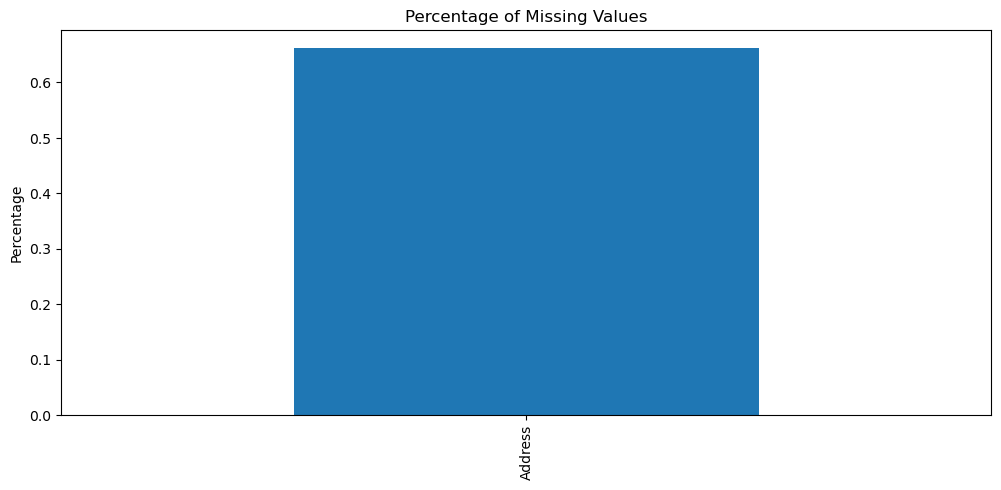

In [11]:
missing_percent[missing_percent > 0].plot(
    kind="bar",
    figsize=(12,5),
    title="Percentage of Missing Values"
)
plt.ylabel("Percentage")
plt.show()


In [12]:
df = df.drop(columns=["Address"])


In [13]:
df.isnull().sum()


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Price         0
Price(USD)    0
dtype: int64

In [14]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: Index(['Room', 'Price', 'Price(USD)'], dtype='object')
Categorical columns: Index(['Area'], dtype='object')


In [15]:
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())


In [16]:
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
threshold = 0.6
df = df.loc[:, df.isnull().mean() < threshold]


In [18]:
df.isnull().sum()


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Price         0
Price(USD)    0
dtype: int64

In [19]:
print("Dataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (3479, 7)


In [20]:
df.to_csv("cleaned_dataset.csv", index=False)


In [21]:
import os
os.listdir()


['.ipynb_checkpoints',
 'cleaned_dataset.csv',
 'cleaned_TehranHouse.csv',
 'data_cleaning.ipynb',
 'TehranHouse.csv',
 'TehranHouse_cleaned.csv',
 'Untitled.ipynb']

In [22]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33
